In [159]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg 
import sklearn.metrics as skm
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import seaborn as sns

In [160]:
#reading data from csv file
df = pd.read_csv("daily_covid_cases.csv")

#converting string datatype to date time
df['Date'] = pd.to_datetime(df['Date'])
print(df)

          Date    new_cases
0   2020-01-30      0.00000
1   2020-01-31      0.00000
2   2020-02-01      0.33333
3   2020-02-02      0.50000
4   2020-02-03      0.60000
..         ...          ...
607 2021-09-28  26421.85714
608 2021-09-29  25222.71429
609 2021-09-30  24557.71429
610 2021-10-01  23806.00000
611 2021-10-02  23022.57143

[612 rows x 2 columns]


          Date    new_cases    month_year
0   2020-01-30      0.00000  October 2021
1   2020-01-31      0.00000  October 2021
2   2020-02-01      0.33333  October 2021
3   2020-02-02      0.50000  October 2021
4   2020-02-03      0.60000  October 2021
..         ...          ...           ...
607 2021-09-28  26421.85714  October 2021
608 2021-09-29  25222.71429  October 2021
609 2021-09-30  24557.71429  October 2021
610 2021-10-01  23806.00000  October 2021
611 2021-10-02  23022.57143  October 2021

[612 rows x 3 columns]


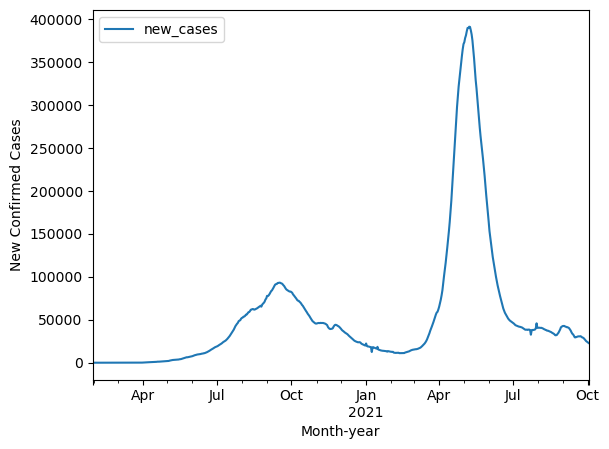

In [161]:
#a

#creating month_year column to store month name and year
df['month_year'] =0
for x in df['Date']:
        df['month_year']=x.strftime('%B %Y')
df.plot(x="Date", xlabel="Month-year", ylabel="New Confirmed Cases")
print(df)
df1=df.copy()

Pearson correlation (autocorrelation) coefficient:0.9990644144715026


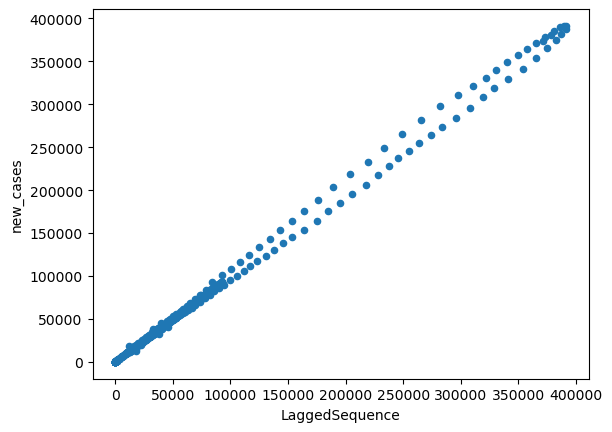

The Pearson correlation for lag of 1 days and original is0.9990644144715026
The Pearson correlation for lag of 2 days and original is0.9963751074839362
The Pearson correlation for lag of 3 days and original is0.9919388573086092
The Pearson correlation for lag of 4 days and original is0.9857861789952967
The Pearson correlation for lag of 5 days and original is0.9779675657688203
The Pearson correlation for lag of 6 days and original is0.9685303994656106


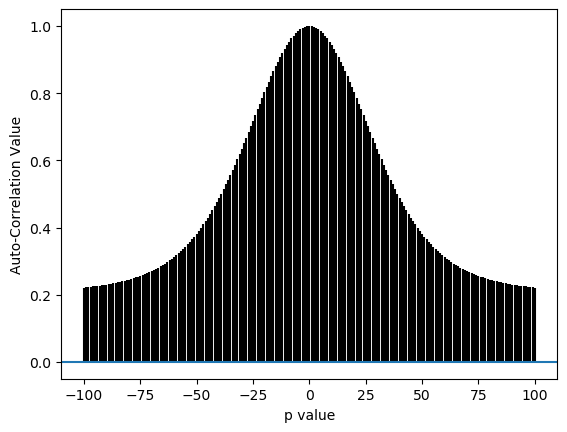

In [162]:
#b
#creating lagged sequence using shift 
df["LaggedSequence"] = df["new_cases"].shift(1)

#Finding correlation between lagged sequence and original sequence
print("Pearson correlation (autocorrelation) coefficient:" +
      str(df["LaggedSequence"].corr(df["new_cases"])))
#c

#plotting scatter plot between two sequences
df.plot.scatter(x='LaggedSequence', y='new_cases')
plt.show()

#d
#repeating the same for different shifts
corr = [] 
dayIndex = [1, 2, 3, 4, 5, 6]
for i in dayIndex:
    df["LaggedSequence"] = df["new_cases"].shift(i)
    corr.append(df["LaggedSequence"].corr(df["new_cases"]))
    print(f'The Pearson correlation for lag of {i} days and original is' + str(corr[i-1]))


#e
plt.acorr(df.new_cases, maxlags=100)
plt.xlabel('p value')
plt.ylabel('Auto-Correlation Value')
plt.show()

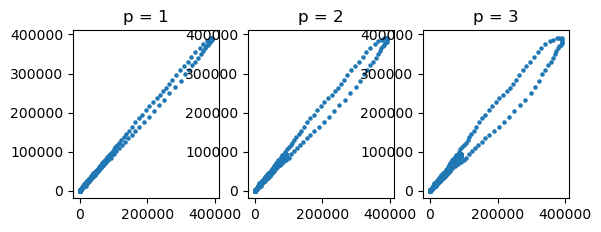

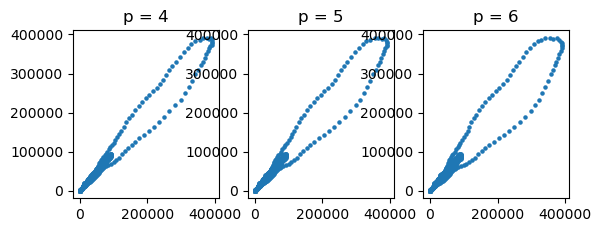

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


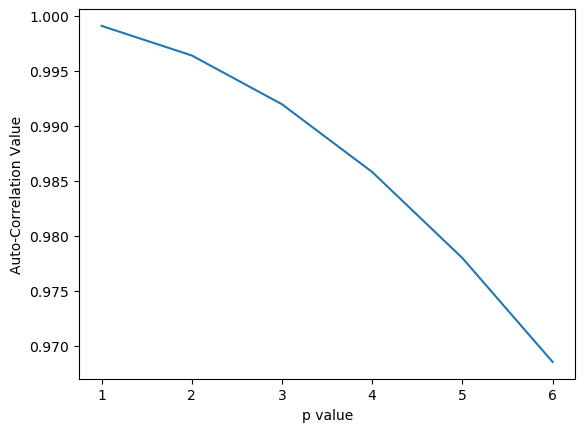

In [163]:
#d
a_corr = []
for i in range(1,7):
    plt.subplot(2,3,i)
    #shifting data by i days
    covid_data_ilag = df.set_index(["Date"]).shift(i)
    df['lagged-i'] = covid_data_ilag['new_cases'].values
    #plotting the scatter plot
    plt.scatter(df.new_cases, df['lagged-i'],s=5)
    plt.title(f'p = {i}')
    a_corr.append(df.new_cases.corr(df['lagged-i']))
    if i==3:
        plt.show()
plt.show()

#plotting auto correlation value for 6 lags
sns.lineplot(x=[1,2,3,4,5,6],y=a_corr)
plt.xlabel('p value')
plt.ylabel('Auto-Correlation Value')
plt.show()

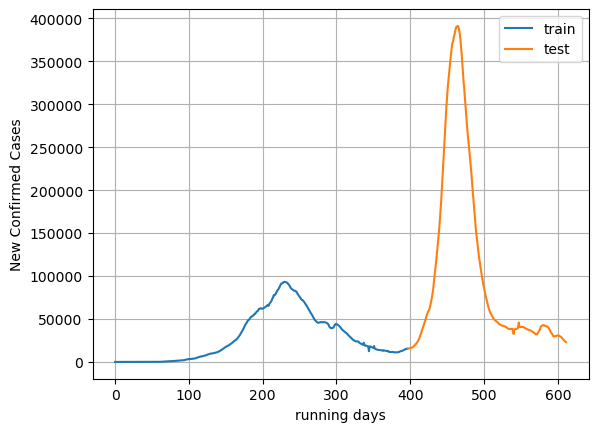

In [164]:
# Answer 2:

#splitting series into test and train
series = pd.read_csv("daily_covid_cases.csv", parse_dates=[
                     'Date'], index_col=['Date'], sep=',')

test_size = 0.35  # 35% for testing
X = series.values
tst_sz = math.ceil(len(X)*test_size)
train, test = X[:len(X)-tst_sz], X[len(X)-tst_sz:]
xlabel=list(range(len(series)))

#plotting train and test
plt.plot(list(range(len(train))), train,label='train')
plt.plot(list(range(len(train),len(train)+tst_sz)),test,label='test')
plt.legend(['train','test'])
plt.grid(True)
plt.xlabel('running days')
plt.ylabel('New Confirmed Cases')
plt.show()

Coefficients: [ 5.99548333e+01  1.03675933e+00  2.61712336e-01  2.75612628e-02
 -1.75391955e-01 -1.52461366e-01]



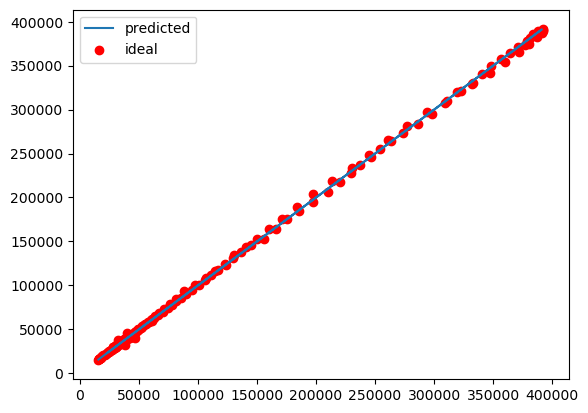

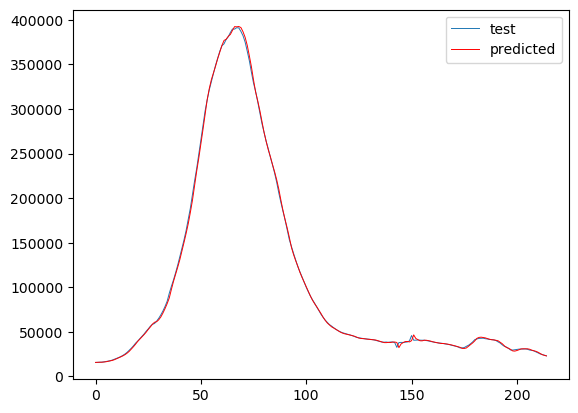

Test RMSPE: 1.8247684769390478
Test MAPE: 0.01574836382405824


In [165]:
# a
model = AutoReg(train, lags=5).fit()

#printing coefficients of trainer AR model
print('Coefficients: %s' % model.params)
print()

# b

#predicting values for test dataset
def predict(lags):
	model = AutoReg(train, lags=lags).fit()
	coef = model.params
	history = train[len(train)-lags:]
	history = [history[i] for i in range(len(history))]
	predictions = list()   #list to hold predictions 
	for t in range(len(test)):
		length = len(history)
		lag = [history[i] for i in range(length-lags, length)]
		yhat = coef[0]
		for d in range(lags):
			yhat += coef[d+1] * lag[lags-d-1]
		obs = test[t]
		predictions.append(yhat)
		history.append(obs)
	return predictions

#function for prediction
predictions=predict(5)

#1)
plt.plot(test,test,label='ideal')
plt.scatter(predictions, test, c='red', label='predicted')
plt.legend(['predicted','ideal'])
plt.show()

#2)
plt.plot(test, label='test', linewidth=0.7)
plt.plot(predictions, color='red', label='predicted', linewidth=0.7)
plt.legend(['test','predicted'])
plt.show()

#3)

#defining RMSPE
def RMSPE(Y_actual, Y_Predicted):
    rmspe = (np.sqrt(skm.mean_squared_error(Y_actual, Y_Predicted))*100)/Y_actual.mean()
    return rmspe

#Defining MAPE function
def MAPE(Y_actual, Y_Predicted):
    mape = skm.mean_absolute_percentage_error(Y_actual, Y_Predicted)
    return mape


print('Test RMSPE:', RMSPE(test, predictions))
print('Test MAPE:' , MAPE(test,predictions))

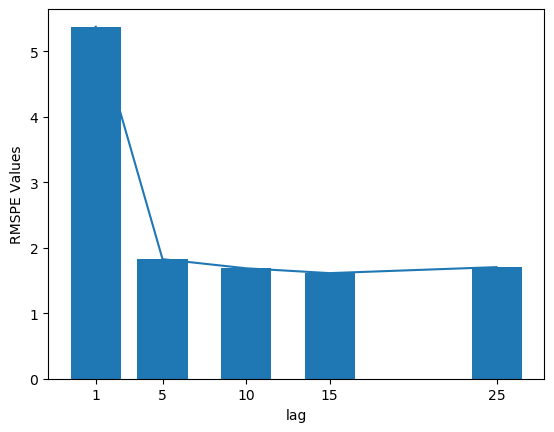

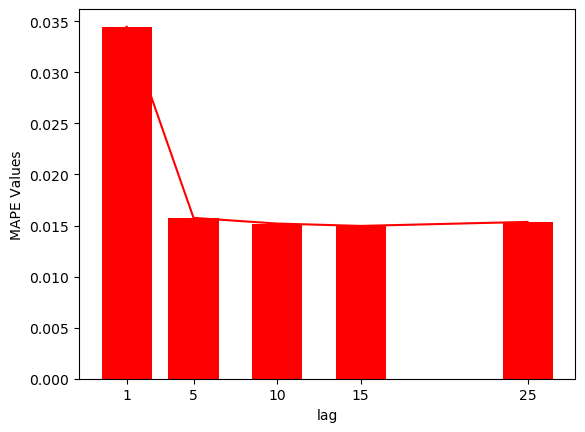

For lag=1:
 RMSPE= 5.372948489180813 
 MAPE= 0.03446540155208938 

For lag=5:
 RMSPE= 1.8247684769390478 
 MAPE= 0.01574836382405824 

For lag=10:
 RMSPE= 1.6855319348807896 
 MAPE= 0.015193699431087825 

For lag=15:
 RMSPE= 1.6119348114122056 
 MAPE= 0.014962361178748515 

For lag=25:
 RMSPE= 1.7033914119395508 
 MAPE= 0.015354207718256858 



In [166]:
#Q3)

rmspe_values = []  # list to store RMSE values with various lags
MAPE_values = []  # list to store MAPE values with various lags

#calculating rmse and mape values for different lags
for i in [1, 5, 10, 15, 25]:
    predictions_new = predict(i)
    MAPE_values.append(MAPE(test, predictions_new))
    rmspe_values.append(RMSPE(test, predictions_new))

list_new = [1, 5, 10, 15, 25]

#rmspe bar graph
plt.bar(list_new, rmspe_values,width=3)
plt.plot(list_new, rmspe_values)
plt.ylabel('RMSPE Values')
plt.xlabel('lag')
plt.xticks([1,5,10,15,25])
plt.show()

#mape bar graph
plt.bar(list_new, MAPE_values, color='red',width=3)
plt.plot(list_new, MAPE_values, color='red')
plt.ylabel('MAPE Values')
plt.xlabel('lag')
plt.xticks([1, 5, 10, 15, 25])
plt.show()

for i in range(len(list_new)):
    print(f'For lag={list_new[i]}:')
    print(f' RMSPE= {rmspe_values[i]} ')
    print(f' MAPE= {MAPE_values[i]} ')
    print()


47 lags



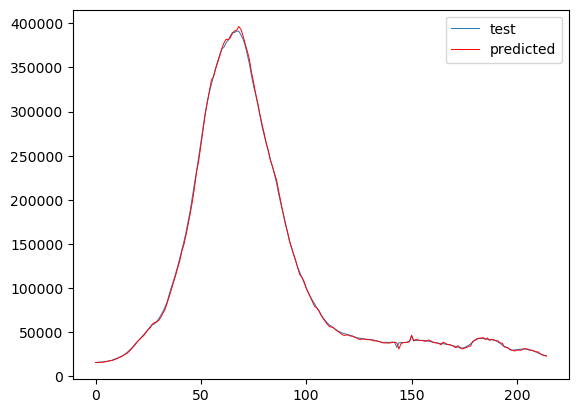

Test RMSPE: 1.7083166409796238
Test MAPE: 0.016371556982303612


In [169]:
#Q4)
data = pd.read_csv('daily_covid_cases.csv')
d = 1

#optimal threshold
lim = 2/np.sqrt(len(train))
while True:
    data["LaggedSequence"] = data["new_cases"].shift(d)

    #assert inequality
    corr = data["LaggedSequence"].corr(data["new_cases"])
    if abs(corr) < lim:
        break
    d += 1

optimal = d-1

print(f'{optimal} lags')
print()

predictions = predict(optimal)

#plotting predicted for optimal lags
plt.plot(test, label='test', linewidth=0.7)
plt.plot(predictions, color='red', label='predicted', linewidth=0.7)
plt.legend(['test', 'predicted'])
plt.show()

#printing rmse and mape values
print('Test RMSPE:', RMSPE(test, predictions))
print('Test MAPE:', MAPE(test, predictions))
